## Ejercicio escogido con Arboles de decisión 

### Juan Esteban Oviedo Mora

In [5]:

#Importamos las librerias 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [9]:
#Cargamos el dataset y mostramos las 5 primeras filas
data = pd.read_csv("Titanic-Dataset.csv")
data.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
data.shape #analisis exploratorios de datos

(891, 12)

In [15]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

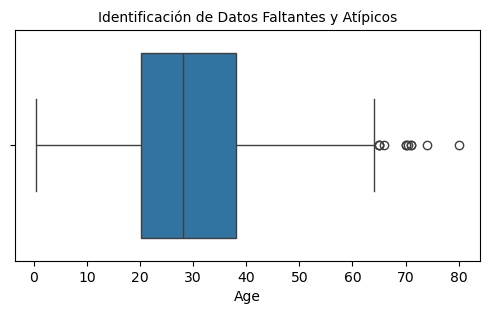

In [19]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['Age'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

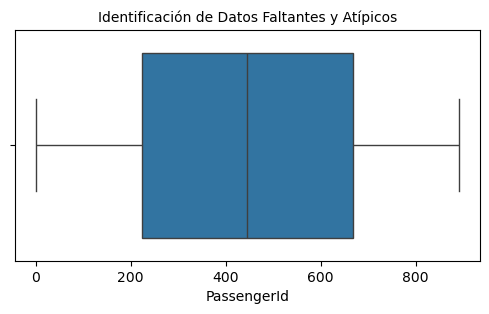

In [21]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['PassengerId'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

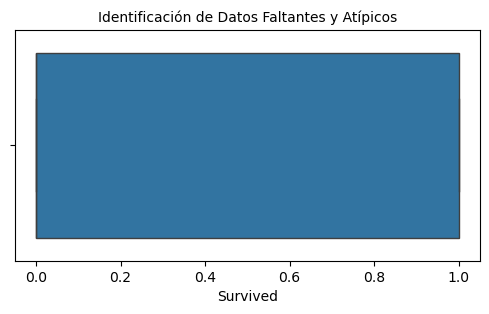

In [23]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['Survived'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

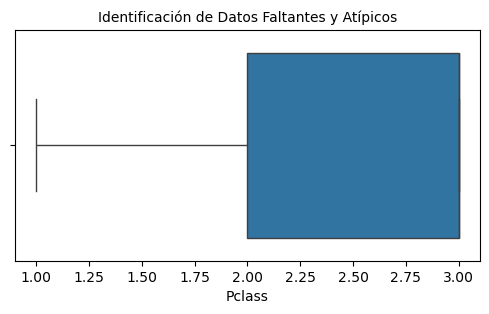

In [25]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['Pclass'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

In [29]:
# Rellenar los valores nulos en 'Age' con la mediana
data['Age'].fillna(data['Age'].median(), inplace=True)

# Rellenar los valores nulos en 'Cabin' con 'Unknown'
data['Cabin'].fillna('Unknown', inplace=True)

# Rellenar los valores nulos en 'Embarked' con la moda
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Verificar que no queden valores nulos
print(data.isna().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


C:\Users\Striker\AppData\Local\Temp\ipykernel_8680\2690363941.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
C:\Users\Striker\AppData\Local\Temp\ipykernel_8680\2690363941.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

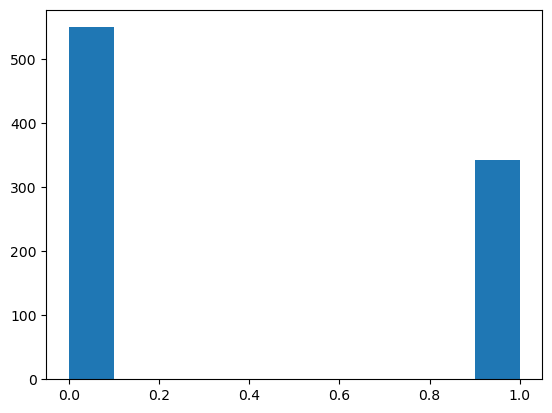

In [33]:
plt.hist(data.Survived)

<Axes: xlabel='Sex', ylabel='Age'>

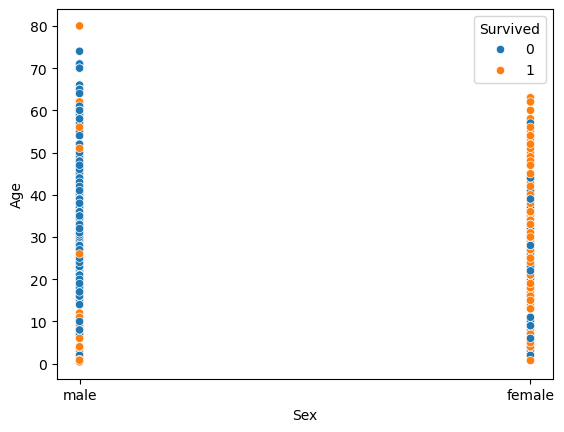

In [35]:
sns.scatterplot(x = "Sex", y = "Age", hue = "Survived", data = data)

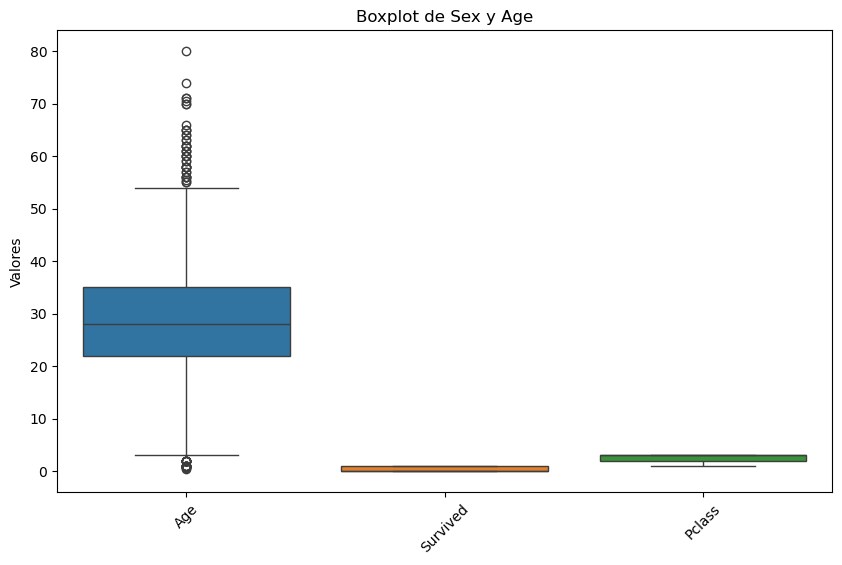

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['Sex', 'Age', 'Survived', 'Pclass']])
plt.xticks(rotation=45)
plt.title('Boxplot de Sex y Age')
plt.ylabel('Valores')
plt.show()

In [49]:
predictors_col = ["Survived", "Age", "Pclass"]
target_col = ['Sex']

In [51]:
predictors = data[predictors_col]
target = data[target_col]

In [53]:
predictors

,Survived,Age,Pclass
0,0,22.0,3
1,1,38.0,1
2,1,26.0,3
3,1,35.0,1
4,0,35.0,3
...,...,...,...
886,0,27.0,2
887,1,19.0,1
888,0,28.0,3
889,1,26.0,1


In [55]:
target

,Sex
0,male
1,female
2,female
3,female
4,male
...,...
886,male
887,female
888,female
889,male


In [57]:
corr = predictors.corr()
corr

,Survived,Age,Pclass
Survived,1.000000,-0.064910,-0.338481
Age,-0.064910,1.000000,-0.339898
Pclass,-0.338481,-0.339898,1.000000


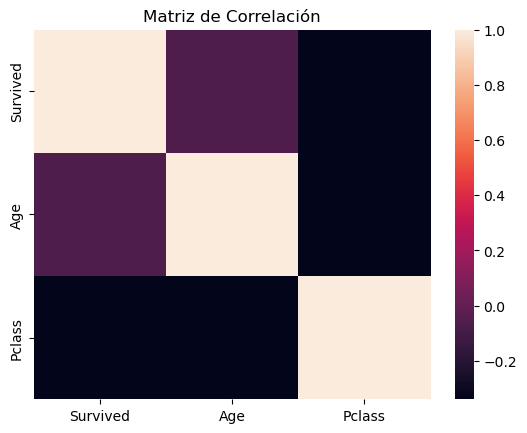

In [59]:
sns.heatmap(corr)
plt.title('Matriz de Correlación')
plt.show()

In [61]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=13)

In [63]:
tree = DecisionTreeClassifier()

In [65]:
arbol = tree.fit(X_train, y_train)

[Text(0.3120828655189621, 0.975, 'x[0] <= 0.5\ngini = 0.45\nsamples = 712\nvalue = [243.0, 469.0]'),
 Text(0.11676646706586827, 0.925, 'x[1] <= 14.75\ngini = 0.249\nsamples = 439\nvalue = [64, 375]'),
 Text(0.2144246662924152, 0.95, 'True  '),
 Text(0.031936127744510975, 0.875, 'x[1] <= 1.5\ngini = 0.494\nsamples = 27\nvalue = [12, 15]'),
 Text(0.023952095808383235, 0.825, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.03992015968063872, 0.825, 'x[1] <= 14.25\ngini = 0.499\nsamples = 25\nvalue = [12, 13]'),
 Text(0.031936127744510975, 0.775, 'x[1] <= 3.5\ngini = 0.497\nsamples = 24\nvalue = [11, 13]'),
 Text(0.015968063872255488, 0.725, 'x[1] <= 2.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.007984031936127744, 0.675, 'gini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.023952095808383235, 0.675, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.04790419161676647, 0.725, 'x[1] <= 5.0\ngini = 0.484\nsamples = 17\nvalue = [7, 10]'),
 Text(0.03992015968063872, 0.675, 'gini

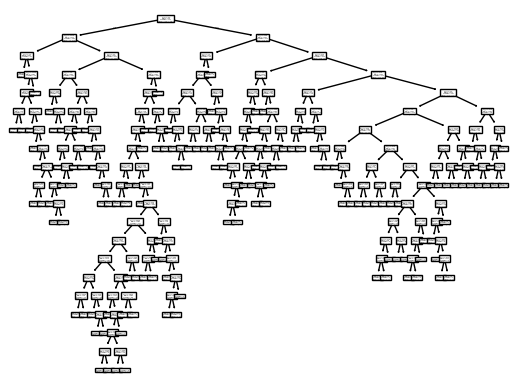

In [67]:
plot_tree(arbol)

In [69]:
predicciones = arbol.predict(X_test)

In [71]:
predicciones


array(['male', 'male', 'male', 'male', 'male', 'male', 'female', 'male',
       'male', 'male', 'male', 'male', 'female', 'male', 'male', 'female',
       'female', 'male', 'male', 'male', 'female', 'female', 'male',
       'male', 'male', 'female', 'male', 'male', 'male', 'male', 'female',
       'female', 'male', 'male', 'male', 'male', 'female', 'male',
       'female', 'female', 'female', 'male', 'male', 'male', 'female',
       'female', 'male', 'male', 'male', 'male', 'male', 'female', 'male',
       'male', 'male', 'female', 'male', 'female', 'male', 'male',
       'female', 'female', 'female', 'female', 'male', 'male', 'female',
       'female', 'male', 'female', 'male', 'male', 'male', 'male', 'male',
       'female', 'male', 'male', 'male', 'female', 'female', 'male',
       'male', 'female', 'female', 'male', 'female', 'female', 'male',
       'male', 'male', 'female', 'male', 'male', 'female', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'f

In [73]:
# Examinamos la matriz de confusión
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,female,male
Actual,,
female,46,25
male,17,91


In [75]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.7653631284916201

In [83]:
precision = precision_score(y_test, predicciones, average='weighted')
precision

0.7629352389514208

In [85]:
recall = recall_score(y_test, predicciones, average='weighted')
recall

0.7653631284916201

In [87]:
f1 = f1_score(y_test, predicciones, average='weighted')
f1

0.7625489869090302